In [181]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
import matplotlib
matplotlib.style.use('ggplot') 

In [169]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [3]:
print('loading pickle..')
dicChr2array_M = pk.load( open( "dicChr2array_M.p", "rb" ) )
dicChr2array_U = pk.load( open( "dicChr2array_U.p", "rb" ) )
print('pickle loaded')

loading pickle..
pickle loaded


In [8]:
file_gff= '/k821209/mungbean_methylation/Vradi_ver6.gff.sort.gff'
df_gff = pd.read_csv(file_gff,sep='\t',header=None)

In [153]:
%%bash
cat /k821209/mungbean_methylation/Vradi_ver6.gff.sort.gff | grep Vradi0268s00120.1

scaffold_268	maker	mRNA	96268	101520	.	-	.	ID=286705;Name=Vradi0268s00120.1;Parent=286704
scaffold_268	maker	exon	96268	96325	0.11	-	.	ID=286711;Name=Vradi0268s00120.1;Parent=286705
scaffold_268	maker	five_prime_UTR	96268	96325	.	-	.	ID=286719;Name=Vradi0268s00120.1;Parent=286705
scaffold_268	maker	exon	96268	96325	0.11	-	.	ID=286743;Name=Vradi0268s00120.1;Parent=286739
scaffold_268	maker	exon	96575	96612	0.11	-	.	ID=286710;Name=Vradi0268s00120.1;Parent=286705
scaffold_268	maker	five_prime_UTR	96575	96584	.	-	.	ID=286718;Name=Vradi0268s00120.1;Parent=286705
scaffold_268	maker	exon	96575	96612	0.11	-	.	ID=286742;Name=Vradi0268s00120.1;Parent=286739
scaffold_268	maker	CDS	96585	96612	.	-	1	ID=286717;Name=Vradi0268s00120.1;Parent=286705
scaffold_268	maker	stop_codon	96585	96587	.	-	.	ID=286721;Name=Vradi0268s00120.1;Parent=286705
scaffold_268	maker	exon	98621	98745	0.11	-	.	ID=286709;Name=Vradi0268s00120.1;Parent=286705
scaffold_268	maker	CDS	98621	98745	.	-	0	ID=286716;Name=Vradi0268s001

In [147]:
df_gff_utr = df_gff[(df_gff[2] == 'five_prime_UTR') | (df_gff[2] == 'three_prime_UTR')]
df_gff_utr['Name'] = df_gff_utr[8].apply(lambda x : x.split(';')[1].replace('Name=',''))
df_gff_utr_ix = df_gff_utr.set_index('Name')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [52]:
df_gff_cds = df_gff[df_gff[2] == 'CDS']
df_gff_cds['Name'] = df_gff_cds[8].apply(lambda x : x.split(';')[1].replace('Name=',''))
df_gff_cds_ix = df_gff_cds.set_index('Name')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
df_gff_gene = df_gff[df_gff[2] == 'mRNA']

In [148]:
df_gff_utr.head()

,0,1,2,3,4,5,6,7,8,Name
3,Vr01,maker,five_prime_UTR,15780,16172,.,+,.,ID=329305;Name=Vradi01g00010.1;Parent=329293,Vradi01g00010.1
5,Vr01,maker,five_prime_UTR,16203,16296,.,+,.,ID=329306;Name=Vradi01g00010.1;Parent=329293,Vradi01g00010.1
7,Vr01,maker,five_prime_UTR,16568,16585,.,+,.,ID=329307;Name=Vradi01g00010.1;Parent=329293,Vradi01g00010.1
28,Vr01,maker,three_prime_UTR,22366,22681,.,+,.,ID=329317;Name=Vradi01g00010.1;Parent=329293,Vradi01g00010.1
84,Vr01,maker,three_prime_UTR,46240,46240,.,-,.,ID=331381;Name=Vradi01g00020.1;Parent=331354,Vradi01g00020.1


In [12]:
df_gff_gene['Name'] = df_gff_gene[8].apply(lambda x : x.split(';')[1].replace('Name=',''))
df_gff_gene_ix = df_gff_gene.set_index('Name')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [144]:
#np.shape(df_gff_cds_ix.loc['Vradi0905s00010.1'][[3,4]].values)
#range(10,20)
#df_gff_cds_ix.loc['Vradi0905s00010.1'][[3,4]].values
#len(np.shape(df_gff_cds_ix.loc['Vradi0905s00010.1'][[3,4]].values))
df_gff_cds_ix.loc['Vradi0905s00010.1']

0                                      scaffold_905
1                                             maker
2                                               CDS
3                                              4331
4                                              4570
5                                                 .
6                                                 -
7                                                 0
8    ID=322437;Name=Vradi0905s00010.1;Parent=322434
Name: Vradi0905s00010.1, dtype: object

(2,)
[4331 4570]
(2, 2)
[[3253 3604]
 [3834 4330]]
2790 2790
(2, 2)
[[58985 59887]
 [59983 60147]]
(2, 2)
[[58845 58984]
 [60148 60791]]
3946 3946
(6, 2)
[[96035 96141]
 [97128 97300]
 [97619 97698]
 [98090 98142]
 [98299 98465]
 [98557 98795]]
(2, 2)
[[96033 96034]
 [98796 98796]]
4763 4763
(3, 2)
[[ 96585  96612]
 [ 98621  98745]
 [100161 100196]]
(5, 2)
[[ 96268  96325]
 [ 96575  96584]
 [100197 100242]
 [100500 100590]
 [100688 101520]]
7252 7252


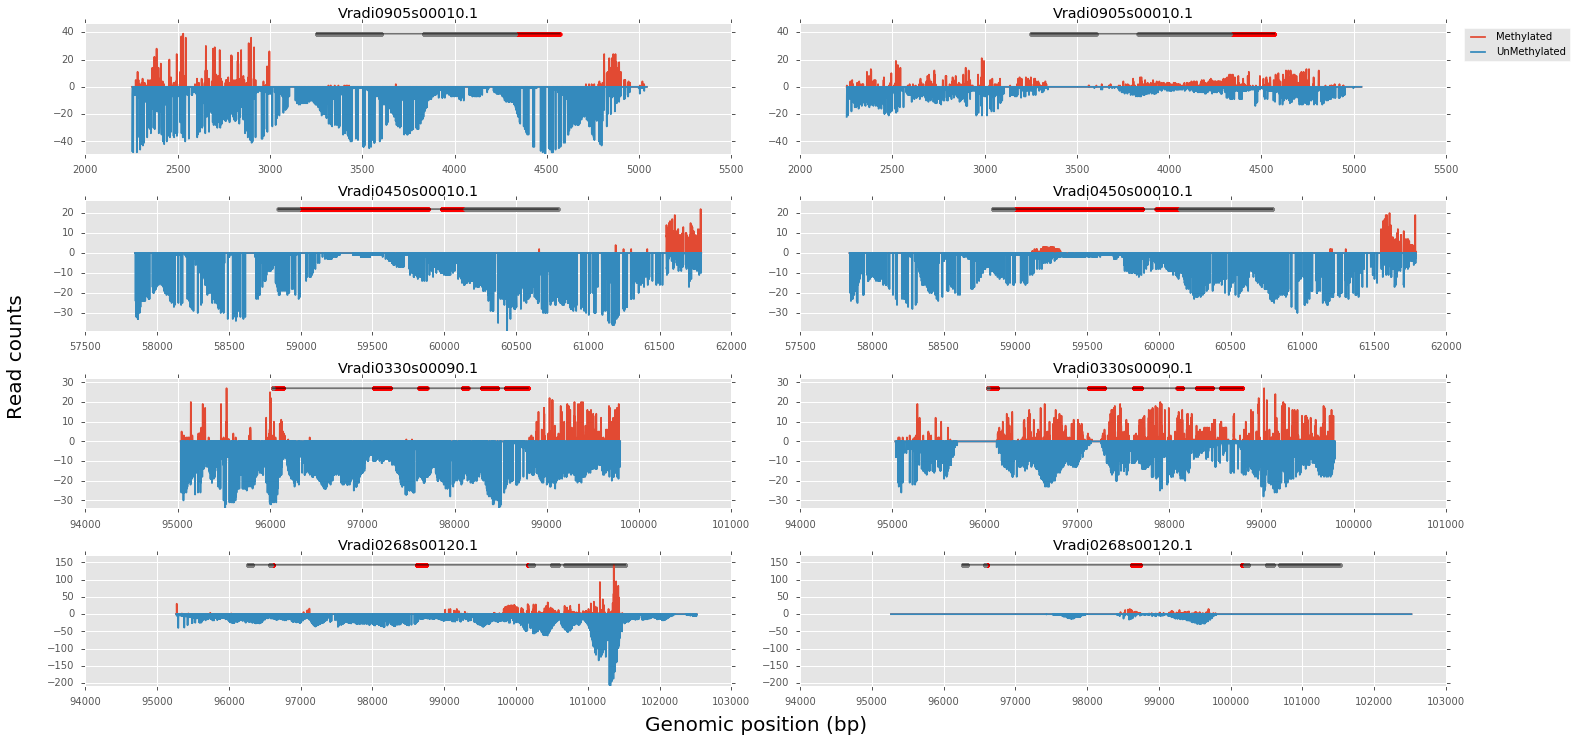

In [185]:
genename_list = ['Vradi0905s00010.1','Vradi0450s00010.1','Vradi0330s00090.1','Vradi0268s00120.1']
fig,ax = plt.subplots(len(genename_list),2,figsize=(20,10))
for n,genename in enumerate(genename_list):
    chromosome, preleft,preright = df_gff_gene_ix.loc[genename][[0,3,4]]
    left = preleft - 1000
    right = preright + 1000
    s_array_M = dicChr2array_M[chromosome][:,0][left:right]
    s_array_U = -dicChr2array_U[chromosome][:,0][left:right]

    k_array_M = dicChr2array_M[chromosome][:,1][left:right]
    k_array_U = -dicChr2array_U[chromosome][:,1][left:right]

    x_array = np.arange(left,left+len(s_array_M))
    ## CDS marking
    genename_cds_matrix = df_gff_cds_ix.loc[genename][[3,4]].values
    print np.shape(genename_cds_matrix)
    print genename_cds_matrix
    dimen = np.shape(genename_cds_matrix)
    if len(dimen) > 1:
        cdsarray = []
        row,col = dimen
        for i in range(row):

            preL,preR = genename_cds_matrix[i,:]
            cdsarray += range(preL,preR)
        cdsarray = np.array(cdsarray)
    elif len(dimen) == 1:
        cdsarray = []
        preL,preR = genename_cds_matrix
        cdsarray = range(preL,preR)
        cdsarray = np.array(cdsarray)
    ## CDS marking end
    
    ## UTR marking 
    genename_utr_matrix = df_gff_utr_ix.loc[genename][[3,4]].values
    print np.shape(genename_utr_matrix)
    print genename_utr_matrix
    dimen = np.shape(genename_utr_matrix)
    if len(dimen) > 1:
        utrarray = []
        row,col = dimen
        for i in range(row):

            preL,preR = genename_utr_matrix[i,:]
            utrarray += range(preL,preR)
        utrarray = np.array(utrarray)
    elif len(dimen) == 1:
        utrarray = []
        preL,preR = genename_utr_matrix
        utrarray = range(preL,preR)
        utrarray = np.array(utrarray)
    ## UTR marking end
    
    
    genearray = np.arange(preleft,preright)
    print len(x_array),len(s_array_M)
    ax[n][0].plot(x_array,s_array_M,label='Methylated')
    ax[n][0].plot(x_array,s_array_U,label='UnMethylated')
    ax[n][0].plot(genearray,[max(s_array_M)]*len(genearray),alpha=0.5,c='black')
    ax[n][0].scatter(cdsarray,[max(s_array_M)]*len(cdsarray),c='r',alpha=1,lw = 0)
    ax[n][0].scatter(utrarray,[max(s_array_M)]*len(utrarray),c='gray',alpha=1,lw = 0)
    ax[n][0].set_title(genename)
    ax[n][0].set_ylim(min(s_array_U),max(s_array_M)*1.2)

    ax[n][1].plot(x_array,k_array_M,label='Methylated')
    ax[n][1].plot(x_array,k_array_U,label='UnMethylated')
    ax[n][1].plot(genearray,[max(s_array_M)]*len(genearray),alpha=0.5,c='black')
    ax[n][1].scatter(cdsarray,[max(s_array_M)]*len(cdsarray),c='r',lw = 0)
    ax[n][1].scatter(utrarray,[max(s_array_M)]*len(utrarray),c='gray',lw = 0)
    
    if n == 0:
        handles, labels = ax[n][1].get_legend_handles_labels()
        ax[n][1].legend(handles, labels,bbox_to_anchor=(1.2, 1))    
    

    #ax.plot(x_array,k_array)
    ax[n][1].set_title(genename)
    ax[n][1].set_ylim(min(s_array_U),max(s_array_M)*1.2)
plt.tight_layout()
fig.text(0.5, -0.02, 'Genomic position (bp)', ha='center',fontsize=20)
fig.text(-0.02, 0.5, 'Read counts', va='center', rotation='vertical',fontsize=20)

In [61]:
np.arange(10,20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [62]:


[0]*7

[0, 0, 0, 0, 0, 0, 0]

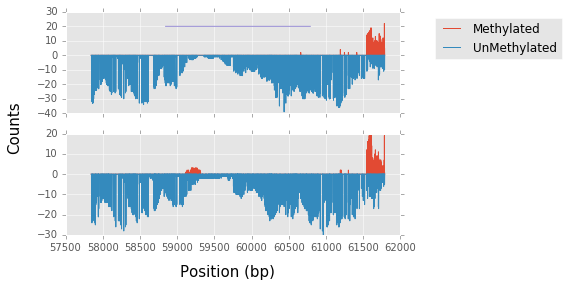

In [109]:
chromosome, left, right = 'scaffold_450' ,   57845   , 61791
gl, gr = 58845, 60791
fig,(ax,ax1) = plt.subplots(2,sharex=True)
s_array_M = dicChr2array_M[chromosome][:,0][left:right]
s_array_U = -dicChr2array_U[chromosome][:,0][left:right]

k_array_M = dicChr2array_M[chromosome][:,1][left:right]
k_array_U = -dicChr2array_U[chromosome][:,1][left:right]

x_array = np.arange(left,right)
x_array_g = np.arange(left+1000,right-1000)
ax.plot(x_array,s_array_M,label='Methylated')
ax.plot(x_array,s_array_U,label='UnMethylated')
ax.plot(x_array_g,[20]*len(x_array_g))
ax1.plot(x_array,k_array_M)
ax1.plot(x_array,k_array_U)

fig.text(0.5, -0.02, 'Position (bp)', ha='center',fontsize=15)
fig.text(-0.01, 0.5, 'Counts', va='center', rotation='vertical',fontsize=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,bbox_to_anchor=(1.5, 1))

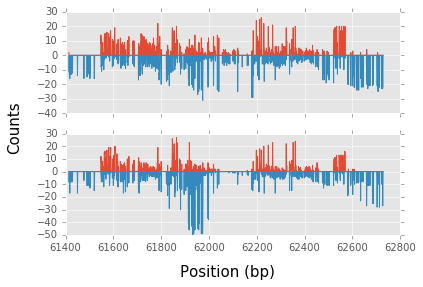

In [110]:
chromosome, left, right = 'scaffold_450' ,   61414   ,62729

fig,(ax,ax1) = plt.subplots(2,sharex=True)
s_array_M = dicChr2array_M[chromosome][:,0][left:right]
s_array_U = -dicChr2array_U[chromosome][:,0][left:right]

k_array_M = dicChr2array_M[chromosome][:,1][left:right]
k_array_U = -dicChr2array_U[chromosome][:,1][left:right]

x_array = np.arange(left,right)

ax.plot(x_array,s_array_M)
ax.plot(x_array,s_array_U)

ax1.plot(x_array,k_array_M)
ax1.plot(x_array,k_array_U)
fig.text(0.5, -0.02, 'Position (bp)', ha='center',fontsize=15)
fig.text(-0.01, 0.5, 'Counts', va='center', rotation='vertical',fontsize=15)

In [186]:
dic = {'Mungbean' : [21.1,24.6,54.3], 'Soybean' : [35.1,33.9,31], 'Arabidopsis' : [41.6,21.6,36.8]}

In [201]:
import pandas as pd
df = pd.DataFrame(dic,index=['CG', 'CGH','CHH'],columns=['Arabidopsis','Soybean','Mungbean'])

In [202]:
df.head()

,Arabidopsis,Soybean,Mungbean
CG,41.6,35.1,21.1
CGH,21.6,33.9,24.6
CHH,36.8,31.0,54.3


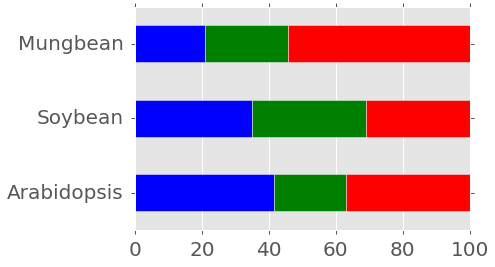

In [203]:
df.T.plot(kind='barh', stacked=True, legend=False, fontsize=20)